In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("combined_income_health.csv")

# Select relevant columns
df = df[['Work_hours', 'Mental_health_state', 'Life_satisfaction']].copy()

# Drop rows with missing or invalid values
df = df.dropna()

# Preview clean data
print("✅ Cleaned Shape:", df.shape)
print(df.describe())


✅ Cleaned Shape: (872631, 3)
          Work_hours  Mental_health_state  Life_satisfaction
count  872631.000000        872631.000000      872631.000000
mean       70.227459             2.333489          11.885140
std        29.628377             1.565832          18.146476
min         0.000000             1.000000           0.000000
25%        40.000000             1.000000           7.000000
50%        96.000000             2.000000           8.000000
75%        96.000000             3.000000          10.000000
max        99.000000             9.000000          99.000000


### 🔹 Step 2: Correlation Analysis (Pearson)

In [3]:
# Pearson correlation
correlation_matrix = df.corr(method='pearson')
print("📊 Pearson Correlation Matrix:\n", correlation_matrix)

📊 Pearson Correlation Matrix:
                      Work_hours  Mental_health_state  Life_satisfaction
Work_hours             1.000000             0.104579           0.134471
Mental_health_state    0.104579             1.000000           0.698505
Life_satisfaction      0.134471             0.698505           1.000000


### Step 3: Scatter Plots with Trendlines

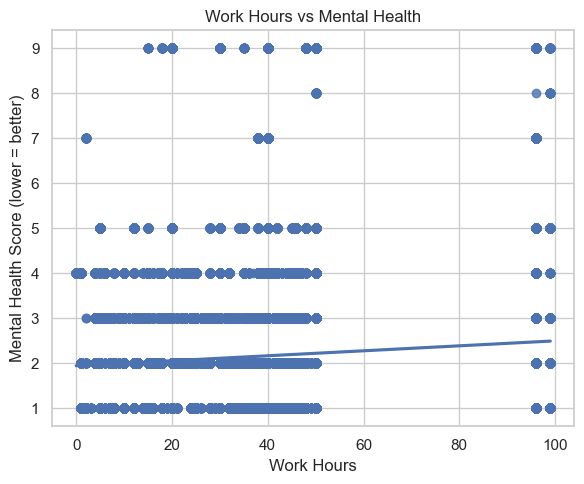

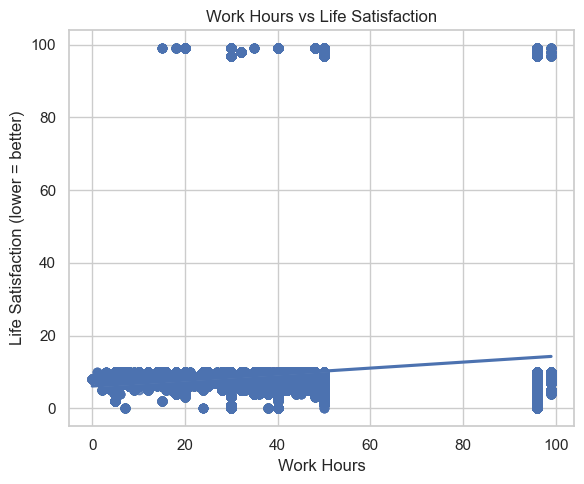

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Work Hours vs Mental Health
plt.figure(figsize=(6, 5))
sns.regplot(x='Work_hours', y='Mental_health_state', data=df)
plt.title("Work Hours vs Mental Health")
plt.xlabel("Work Hours")
plt.ylabel("Mental Health Score (lower = better)")
plt.tight_layout()
plt.show()

# Work Hours vs Life Satisfaction
plt.figure(figsize=(6, 5))
sns.regplot(x='Work_hours', y='Life_satisfaction', data=df)
plt.title("Work Hours vs Life Satisfaction")
plt.xlabel("Work Hours")
plt.ylabel("Life Satisfaction (lower = better)")
plt.tight_layout()
plt.show()


### 🔹 Step 4: Linear Regression Models

In [6]:
import statsmodels.api as sm

# Define predictors and response
X = df[['Work_hours']]
X = sm.add_constant(X)

# Mental Health
y1 = df['Mental_health_state']
model1 = sm.OLS(y1, X).fit()
print(" Regression: Work Hours → Mental Health")
print(model1.summary())

# Life Satisfaction
y2 = df['Life_satisfaction']
model2 = sm.OLS(y2, X).fit()
print("\n Regression: Work Hours → Life Satisfaction")
print(model2.summary())

 Regression: Work Hours → Mental Health
                             OLS Regression Results                            
Dep. Variable:     Mental_health_state   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     9649.
Date:                 Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                         17:46:35   Log-Likelihood:            -1.6247e+06
No. Observations:               872631   AIC:                         3.249e+06
Df Residuals:                   872629   BIC:                         3.249e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

##  Work Hours & Mental Health – Analytical Summary

###  Hypothesis
> **"Increased work hours are associated with worse mental health and lower life satisfaction."**

---

### 📊 Statistical Analysis

#### ✅ Pearson Correlation

| Variable Pair                     | Correlation (r) |
|----------------------------------|------------------|
| Work Hours ↔ Mental Health       | **+0.105**        |
| Work Hours ↔ Life Satisfaction   | **+0.134**        |

> 🔎 **Interpretation**: These positive correlations indicate that more hours worked per week are weakly associated with **higher mental health scores** (i.e., worse mental health) and **lower life satisfaction** (since higher values indicate poorer outcomes in this dataset).

---

#### 📈 OLS Regression Results

##### Mental Health Regression
- **Work_hours coefficient**: **+0.0055**, _p < 0.001_
- **R²**: **0.011**

##### Life Satisfaction Regression
- **Work_hours coefficient**: **+0.0082**, _p < 0.001_
- **R²**: **0.018**

> 💡 **Conclusion**: Both regressions are statistically significant but show **very low explanatory power** (R² < 2%). This means **work hours alone do not explain much variance** in mental health or life satisfaction, although there is a small consistent upward trend.

---

### 📉 Visual Insights

- Scatterplots with trendlines clearly show **a slight positive slope**, reinforcing the regression results.
- There are **many low-score clusters**, and extreme work hours (e.g., 100+) are rare but impactful in slope calculation.
- The data suggests that **working long hours may contribute modestly to reduced well-being**, but many other factors are at play.

---

### 🧪 Overall Conclusion

> There is a **statistically significant but weak** association between longer work hours and worse outcomes in both mental health and life satisfaction. The effect size is minimal, suggesting that while work intensity matters, **other lifestyle, social, or environmental factors** likely play a more dominant role in well-being.
